In [196]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns

In [197]:
df=pd.read_csv("./data.csv")
df.head(1)

,Equipo,Nombre,Posicion,Altura,Edad,Apariciones,Goles,Asistencias,Tarjetas Amarillas,2da Tarjeta Amarillas,...,Goles Concedidos,Valla Invicta,Minutos Jugados,Dias De baja por Lesion,Partidos Perdidos por Lesion,Premios,Valor Actual,Valor Maximo,Posicion Numero,Extremo
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0


CARACTERISTICAS, Y DATOS DE JUGADORE DE FUTBOL DE PRIMERA DIVISION, A NIVEL MUNDIAL (2021-2022)

1.DESCRIPCION:



El conjunto de datos proporciona información detallada sobre jugadores de fútbol, destacando aspectos esenciales como equipo, nombre, posición, estadísticas de juego, tarjetas, premios y valores asociados. Cada entrada ofrece una visión exhaustiva de la participación de los jugadores en el campo, su rendimiento, así como datos demográficos como altura y edad. Este dataset presenta una valiosa noción para analizar el desempeño individual y colectivo de los jugadores, así como para evaluar su valor en el mercado y sus logros a lo largo del tiempo.

2.DATASET

El Dataset, se encuentra en formato csv, con los registros de todos los jugadores, de cada equipos de las ligas, y todos sus registros de las variables previamente nombradas.

3.Definicion de la tematica.

Edad y Valor : Como se relacionan la edad de los jugadores respecto al valor de cada jugador ( en USD).

En el mundo del fútbol, la edad de los jugadores se ha convertido en un factor crucial a la hora de evaluar su valor en el mercado. En este analisis, analizaremos cómo la edad de los jugadores impacta directamente en su valor, representado en cifras monetarias en dólares estadounidenses. ¿Existe una correlación clara entre la edad de un jugador y su valor en el mercado futbolístico?

Preguntas de Interés

¿Cómo impacta la edad en el valor actual de los jugadores de fútbol?

¿Cuándo el Valor Actual supera al Valor Máximo en la carrera de un jugador?

¿En qué edad se produce el punto de inflexión donde el Valor Actual no alcanza al Valor Máximo?

¿A menor edad, la tendencia es que el valor maximo y el actual, son parecidos?

Hipótesis:


 "Los jugadores de 20 a 25 años, llegan a su punto o valor maximo, del monto de su pase."

In [198]:
# limpio la  el nombre de la posicion
df['Posicion']= df['Posicion'].str.extract(r'^\s*([^\s-]+)')

In [199]:
# tomo las columnas que voy a usar del df original.
df_jugadores=df[['Nombre','Posicion','Equipo','Edad','Valor Actual','Valor Maximo']]

In [200]:
# Desactivar la advertencia SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

In [201]:
# dejo los valores en millones para que sea mas facil de trabajar.
df_jugadores['Valor Actual'] = df_jugadores['Valor Actual'] / 1000000
df_jugadores['Valor Maximo'] = df_jugadores['Valor Maximo'] / 1000000
df_jugadores['Dif Maximo - Actual'] = df_jugadores['Valor Actual'] - df_jugadores['Valor Maximo']


In [202]:
# trabajo en un copia, por seguridad
df_equipos=df_jugadores.copy()
df_equipos_2=df_jugadores.copy()


In [203]:
# Agrupo por Edad y Posicion, y calculo el promedio del valor actual, y valor maximo.
df_jugadores = df_jugadores.groupby(['Edad']).agg({'Valor Actual':'mean', 
                                                                'Valor Maximo':'mean'}).reset_index()


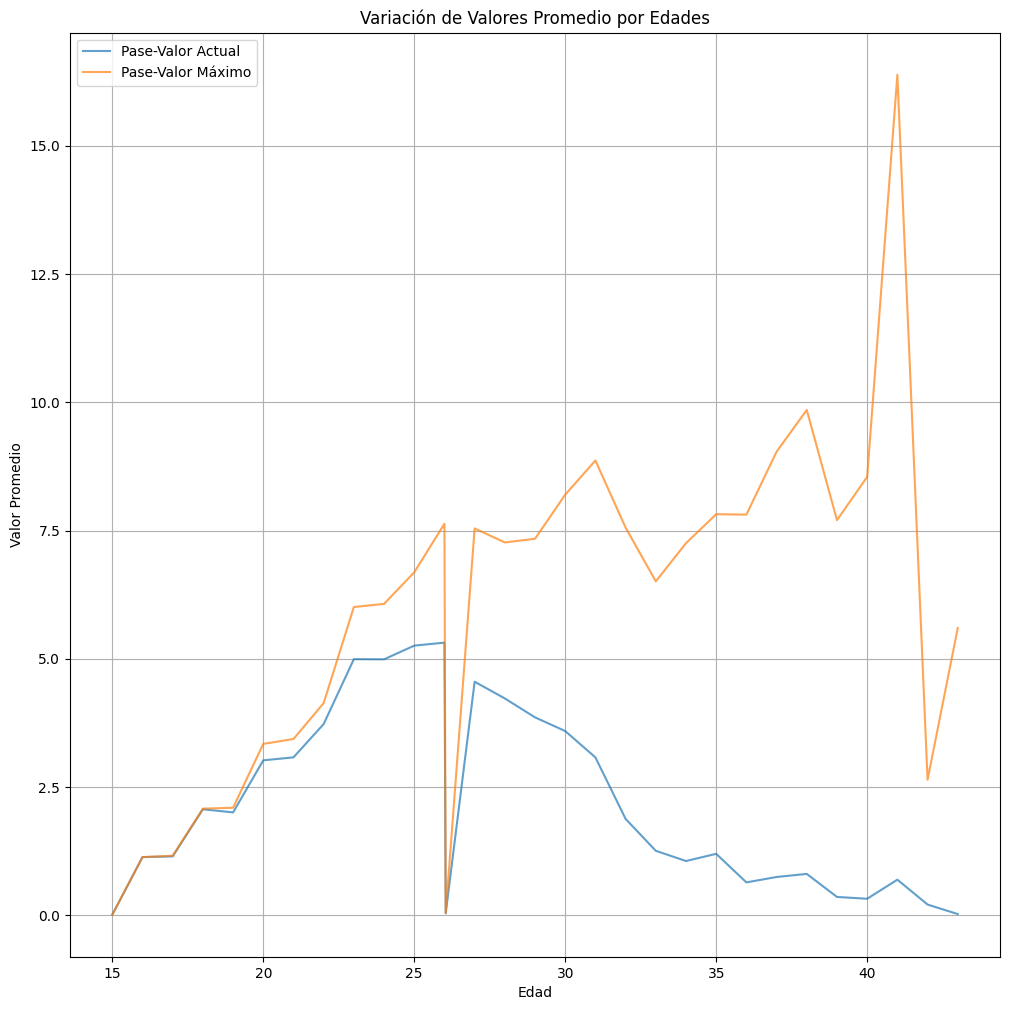

In [204]:
# Creo la figura
plt.figure(figsize=(12, 12))


# Uso un linePlot, que marcara, el recorrido del valor del pase actual, y el valor maximo de cada jugador.
sns.lineplot(x='Edad', y='Valor Actual', data=df_jugadores, label='Pase-Valor Actual', alpha=0.7)
sns.lineplot(x='Edad', y='Valor Maximo', data=df_jugadores, label='Pase-Valor Máximo', alpha=0.7)

# Configuración del gráfico (titulos y leyendas)
plt.title('Variación de Valores Promedio por Edades')
plt.xlabel('Edad')
plt.ylabel('Valor Promedio')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


Conclusiones:

*En el grafico podemos notar las variaciones del valor de los pases.


*Podemos concluir que en el primer rango, 15-25 años, practicamente el valor actual coincide con el valor
 máximo del jugador, podemos decir que esta a tope de su carrera, llegando a su cotizacion maxima.

*Luego a partir de los 25 años el valor comienza con una marcada, pero leve tendencia a la baja del valor actual, constrastando mucho con su pico maximo. 

*Y el ultimo rango , podemos decir que va de los 32/33 años en adelante, el valor actual empieza una marcada
caida de su valor.

------------------------------------------------------------------------------------------------

A continuacion, se creara un Df con los equipos mas valiosos del mundo.

Se fraccionara las edades por rango, menores de 20, de 20 a 26, 27 a 30, y mayores de 30

Se plantea asi, para entender como estan compuesto por edades los equipos mas valiosos, y si tiene relacion, con la variacion de los valores de los pases de los jugadores, respecto a la edad, y al avance de la misma.

Usando la Hipotesis anterior "Los jugadores de 20 a 25 años, llegan a su punto o valor maximo, del monto de su pase.", analizaremos los equipos mas valiosos del mundo, y veremos como estan compuesto segun rango de edad.

In [205]:
# se crea una lista con los intervalos de edades
lista_edades_rango = [0, 20, 26, 30, 100]

# lista con el nombre de los intervalos
rango = ['Menores de 20', '20-26', '27-30', 'Mayores de 30']

# creo la columna rangos de edad, que segmentara segun condicion.
df_equipos_2['Rango Edad'] = pd.cut(df_equipos_2['Edad'], bins=lista_edades_rango , labels=rango)

# Creo un df, que me va a agrupar por equipo segun las siguientes operaciones
# valor total de cada equipo
# edad promedio de cada equipo (mean)
# contar la cantidad de jugadores.
df_agrupado = df_equipos_2.groupby(['Equipo', 'Rango Edad']).agg({
    'Valor Actual': 'sum',
    'Edad': 'mean',
    'Nombre': 'count'
}).reset_index()


# creo un df, usando la funcion pivot, por practicidad.
df_pivot = df_agrupado.pivot(index='Equipo', columns='Rango Edad', values=['Valor Actual', 'Nombre'])


# Renombrar las columnas
df_pivot.columns = [f'{col[0]}_{col[1]}' for col in df_pivot.columns]

# Calcular el valor total del equipo
df_pivot['Valor Total'] = df_pivot['Valor Actual_Menores de 20'] + df_pivot['Valor Actual_20-26'] + df_pivot['Valor Actual_27-30'] + df_pivot['Valor Actual_Mayores de 30']

# cantidad de jugadores segun rango de edades
df_pivot['- 20'] = df_pivot['Nombre_Menores de 20']
df_pivot[' 20-26'] = df_pivot['Nombre_20-26']
df_pivot[' 27-30'] = df_pivot['Nombre_27-30']
df_pivot['+30'] = df_pivot['Nombre_Mayores de 30']

# Eliminar columnas innecesarias, ya que no las necesito 
df_pivot.drop(columns=['Valor Actual_Menores de 20', 'Valor Actual_20-26', 'Valor Actual_27-30', 'Valor Actual_Mayores de 30','Nombre_Menores de 20', 'Nombre_20-26', 'Nombre_27-30', 'Nombre_Mayores de 30'], inplace=True)

# Calcular la edad promedio por equipo
df_promedio_edad = df_equipos.groupby('Equipo')['Edad'].mean().round(1).reset_index()

# renombro la columna
df_promedio_edad.rename(columns={'Edad': 'Edad Promedio'}, inplace=True)

# Combinar con el df , del promedio de edad ,  con el pivot y agregarlo como una nueva fila al final
df_pivot = pd.merge(df_pivot, df_promedio_edad, on='Equipo', how='left')

# Ordeno el df pivot por valor total  (descendente)
df_pivot.sort_values(by='Valor Total', ascending=False)

# creo un df con los 20 equipos mas valiosos del mundo.
df_top10_equipos = df_pivot.sort_values(by='Valor Total', ascending=False).head(10)
df_top10_equipos.reset_index(drop=True, inplace=True)


En el df que esta a continuacion, la hipotesis que planteamos del rango de edad 20/25, podemos concluir que:

Al sumar los valores de mercado de los jugadores de cada equipo, se observa que la mayoría de la composición total proviene principalmente del rango de edades entre 20 y 25 años. Incluso considerando a los jugadores menores de 20 años, como por ejemplo, aquellos con 19 años, también constituyen una parte significativa del conjunto. Es evidente que, al ampliar el rango hasta los 30 años, estos jugadores conforman casi en su totalidad el plantel de los equipos, destacando la importancia de este grupo etario en la estructura de los equipos.

A continuacion vamos a graficarlo para ponerlo en perspectiva.

In [206]:
df_top10_equipos


,Equipo,Valor Total,- 20,20-26,27-30,+30,Edad Promedio
0,Manchester City,1051.25,2.0,7.0,10.0,5.0,27.0
1,Chelsea FC,1015.50,4.0,16.0,5.0,7.0,25.5
2,Bayern Munich,979.70,5.0,7.0,7.0,8.0,26.5
3,Arsenal FC,890.00,0.0,16.0,6.0,1.0,25.2
4,Paris Saint-Germain,882.55,9.0,7.0,6.0,5.0,25.1
5,Liverpool FC,879.00,4.0,12.0,7.0,7.0,26.7
6,Real Madrid,870.50,2.0,8.0,6.0,8.0,27.6
7,FC Barcelona,799.00,5.0,10.0,1.0,6.0,25.5
8,Manchester United,795.70,3.0,14.0,10.0,5.0,26.0
9,Tottenham Hotspur,680.30,1.0,14.0,7.0,3.0,26.7


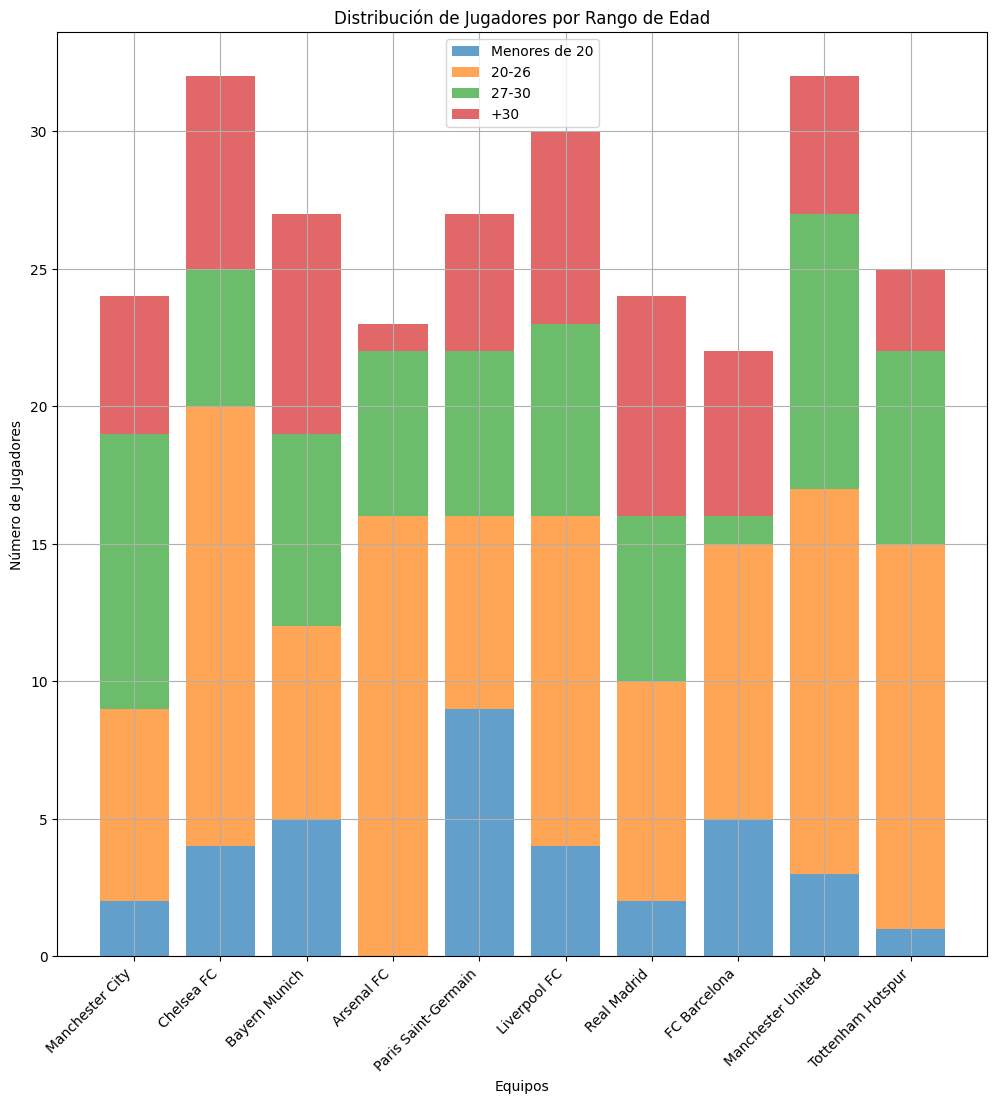

In [210]:
# creo un df, con la cantidad de jugadores por edad
rango_20 = df_top10_equipos['- 20']
rango_20_26 = df_top10_equipos[' 20-26']
rango_27_30 = df_top10_equipos[' 27-30']
rango_30 = df_top10_equipos['+30']

# Crear figura y Configurar el gráfico
plt.figure(figsize=(12, 12))

# a cada barra, le asigno la cantidad por cada rango etario
# se puso de esta forma, para llenar la barra completa, pero dentro de ella, los rango etarios, con su cantidad
# para tener dimension de como estan compuesto los equipos etariamente, de forma grafica.
plt.bar(df_top10_equipos['Equipo'], rango_20,    bottom=0,                                     label='Menores de 20', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_20_26, bottom=rango_20,                              label='20-26', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_27_30, bottom=rango_20_26 + rango_20,                label='27-30', alpha=0.7)
plt.bar(df_top10_equipos['Equipo'], rango_30,    bottom=rango_27_30 + rango_20_26 + rango_20,  label='+30',   alpha=0.7)

# Configurar el gráfico
plt.xlabel('Equipos')
plt.ylabel('Número de Jugadores')
plt.title('Distribución de Jugadores por Rango de Edad')
plt.legend()
plt.grid(True)

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


En el grafico de barras, apiladas, podemos ver como estan compuesto los equipos por rangos etarios, y a simple vista, el rango 20/25 mayoritarimente, es el que mas jugadores tiene , y mas aun, cuando lo expandimos al rango menores de  20, mas 20/25, mas 26/30, casi ocupan la totalidad de la plantilla.

Como conclusion final, podemos decir que la edad es un factor fundamental para el valor actual del pase de un jugador de futbol, y la composicion de la plantilla de los equipos mas ricos del mundo.